For this task, I am gathering data relating to crime news in New York City. The website I am using is **nydailynews.com**, which serves as a common repository to report happenings from New York City. I specifically use crim data from this website.

In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from datetime import datetime

I use the Python Requests module to scrape the data from the given URL

In [3]:
URL = "https://www.nydailynews.com/tag/nyc-crime"
r = requests.get(URL)

BeautifulSoup is a popular Python library for web scraping and gathering data in an HTML format, making it easier to process and work with.

In [4]:
soup = BeautifulSoup(r.content, 'html5lib')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="newyorkdailynews" id="app-name" name="application-name"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="4B535F7EB2971D1FCBA5D1D3E3E292C3" name="msvalidate.01"/>
  <title>
   NYC Crime – New York Daily News
  </title>
  <meta content="max-image-preview:large" name="robots"/>
  <script type="text/javascript">
   /* <![CDATA[ */
var scriptHelpers = {"staticPath":"https:\/\/www.nydailynews.com\/wp-content\/themes\/assets\/static\/"};
/* ]]> */
  </script>
  <link href="//cmp.osano.com" rel="dns-prefetch"/>
  <link href="//htlbid.com" rel="dns-prefetch"/>
  <link href="//cdn.parsely.com" rel="dns-prefetch"/>
  <link href="//ajax.googleapis.com" rel="dns-prefetch"/>
  <link href="//h689.nydailynews.com" rel="dns-prefetch"/>
  <link href="//stats.wp.com" rel="dns-prefetch"/>
  <link href="//cdn.jsdelivr.net" rel="dns-prefetch"/>
  <link href="//fonts.googleapis.com

We can see that there is a lot of information contained here. We are interested in finding the list of news headlines. After going through the object returned, I found that news headlines are present in the div with the id **primary**. Each headline has its own class, of the form **dfm-title**.

In [5]:
table = soup.find('div',attrs= {'id':'primary'})
tb = table.findAll('span', attrs = {'class':'dfm-title'})
count=1
for row in tb:
    print(count," : ",str(row.text).strip())
    count+=1

1  :  One-time aide to ex-Gov. Cuomo files Adult Survivors Act lawsuit over alleged Executive Mansion groping
2  :  Driver busted for crashing SUV into Washington Heights train station entrance: cops
3  :  Woman, 69, found fatally shot in neck outside Brooklyn home: NYPD
4  :  Washington Heights chain snatcher shot in the back by victim in caught-on-camera killing: sources
5  :  Man stabbed to death near Brooklyn homeless encampment: NYPD
6  :  Investigator in Correction Department officer misconduct unit busted in stolen car with cocaine, heroin
7  :  Ex-diplomat accused of hurling hate words at NYC halal vendors ‘peace-loving’, says lawyer at Manhattan arraignment
8  :  Teen dead, man wounded in Tribeca street stabbing attack, NYPD says
9  :  Long Island woman, 23, killed in LIE drunk driving crash was a daddy’s girl with bright future
10  :  Ex-con shoots Astoria building super, then opens fire from sixth-floor window at NYPD cops before shooting self


We can see that 10 news headlines have been returned from this URL. Now I find the timestamps for these by finding the **time** tagged object.

In [6]:
timestamps = table.findAll('time')
count=1
for ts in timestamps:
    #date,time = ts['datetime'].split()
    #print(count," : ",date)
    print(count, " : ",ts['datetime'])
    count+=1

1  :  2023-11-24 16:57:49
2  :  2023-11-24 12:09:09
3  :  2023-11-24 17:04:17
4  :  2023-11-24 15:00:53
5  :  2023-11-24 16:52:38
6  :  2023-11-24 11:19:23
7  :  2023-11-23 19:52:06
8  :  2023-11-23 19:53:44
9  :  2023-11-22 19:31:26
10  :  2023-11-22 17:27:56


So we can see that scraping data off the homepage of this website returns 10 news items, but they only correspond to 2-3 days of data. I want some more data, ideally covering one month. I looked at the website and it has a pagination based structure. Hence I can use that to scrape data off of further pages as well! I store all the headlines and datetimes in a pandas dataframe.

In [7]:
news_df = pd.DataFrame()

In [8]:
headlines = []
dates = []
pagination = list(np.arange(1,13))
for page_no in pagination:
    URL = "https://www.nydailynews.com/tag/nyc-crime/page/" + str(page_no)
    r = requests.get(URL)
    soup = BeautifulSoup(r.content,'html5lib')
    content = soup.find('div',attrs = {'id':'primary'})
    entries = content.findAll('span',attrs={'class':'dfm-title'})
    for entry in entries:
        headline = str(entry.text).strip()
        headlines.append(headline)
        
    timestamps = content.findAll('time')
    for timestamp in timestamps:
        date_time = timestamp['datetime']
        date, time = date_time.split(" ")
        dates.append(date)

In [9]:
news_df['Headlines'] = headlines
news_df['Dates'] = dates
news_df.head()

,Headlines,Dates
0,One-time aide to ex-Gov. Cuomo files Adult Sur...,2023-11-24
1,Driver busted for crashing SUV into Washington...,2023-11-24
2,"Woman, 69, found fatally shot in neck outside ...",2023-11-24
3,Washington Heights chain snatcher shot in the ...,2023-11-24
4,Man stabbed to death near Brooklyn homeless en...,2023-11-24


Saving the data into a CSV file (deliverable)

In [11]:
news_df.to_csv('NYC Crime News.csv',index=False)

Creation of a function to find headlines with a given keyword. Using dataframe slicing to find whether each headline entry contains the given keyword substring, we can find and return a list of headlines corresponding to the given keyword.

In [12]:
def find_headline_by_keyword(df, keyword):
    df_keyword = df[df['Headlines'].str.contains(keyword)]
    headlines_list = list(df_keyword['Headlines'])
    return headlines_list

Example keyword: Brooklyn

In [13]:
list_headlines = find_headline_by_keyword(news_df,'Brooklyn')
list_headlines

['Woman, 69, found fatally shot in neck outside Brooklyn home: NYPD',
 'Man stabbed to death near Brooklyn homeless encampment: NYPD',
 'Brooklyn man was ‘sickly’ and no threat to cousin who shot him dead in Bedford-Stuyvesant, victim’s daughter says',
 'Brooklyn woman who threw coffee at dad in Palestinian scarf surrenders to face hate crime charges',
 'Brooklyn landlord charged only with gun possession in slay of tenant who survived being shot year earlier (EXCLUSIVE)',
 'New arrest as family mourns father of twins gunned down returning to old Brooklyn public housing stomping grounds',
 'Man, 64, shot dead outside Brooklyn home; person of interest in custody: NYPD',
 'Jealous husband kills wife, wounds stepson in Brooklyn shooting, say neighbors, NYPD',
 'Elderly woman killed in hit-and-run ‘peacefully’ crossing Brooklyn street: ‘He never slowed down’',
 'Cops arrest woman who slapped teen, man at pro-Palestinian march on Brooklyn Bridge',
 'Brooklyn ex-con pleads guilty to mid-sermo

In the Next step, I use textBlob, an open source sentiment analysis toolbox, to rate the sentiments associated with the headlines we parsed. 

textBlob library returns 2 kinds of sentiment scores:

1. Polarity: Polarity is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments. 

2. Subjectivity: Subjectivity is also a float which lies in the range of [0,1]. Subjective sentences generally refer to personal opinion, emotion, or judgment. 

In [14]:
from textblob import TextBlob

In [15]:
l = len(news_df)
polarity_scores = []
subjectivity_scores = []
for i in range(l):
    text = news_df.iloc[i]['Headlines']
    polarity = TextBlob(text).sentiment.polarity
    polarity_scores.append(polarity)
    subjectivity = TextBlob(text).sentiment.subjectivity
    subjectivity_scores.append(subjectivity)

news_df['Polarity Scores'] = polarity_scores
news_df['Subjectivity Scores'] = subjectivity_scores
news_df.head()

,Headlines,Dates,Polarity Scores,Subjectivity Scores
0,One-time aide to ex-Gov. Cuomo files Adult Sur...,2023-11-24,0.0000,0.200
1,Driver busted for crashing SUV into Washington...,2023-11-24,0.0000,0.000
2,"Woman, 69, found fatally shot in neck outside ...",2023-11-24,0.0000,0.050
3,Washington Heights chain snatcher shot in the ...,2023-11-24,-0.0375,0.025
4,Man stabbed to death near Brooklyn homeless en...,2023-11-24,0.1000,0.400


Grouping by date and calculating the average value of sentiment scores for each date.

In [16]:
news_datewise = news_df.groupby('Dates').mean()
news_datewise.head()

,Polarity Scores,Subjectivity Scores
Dates,,
2023-11-01,0.166667,0.283333
2023-11-02,-0.132937,0.176984
2023-11-03,0.075000,0.362500
2023-11-04,0.042857,0.157143
2023-11-05,0.045455,0.151515


In [17]:
import matplotlib.pyplot as plt

Plotting a time series graph of sentiment scores for each date. Polarity scores are in red and subjectivity scores are in green.

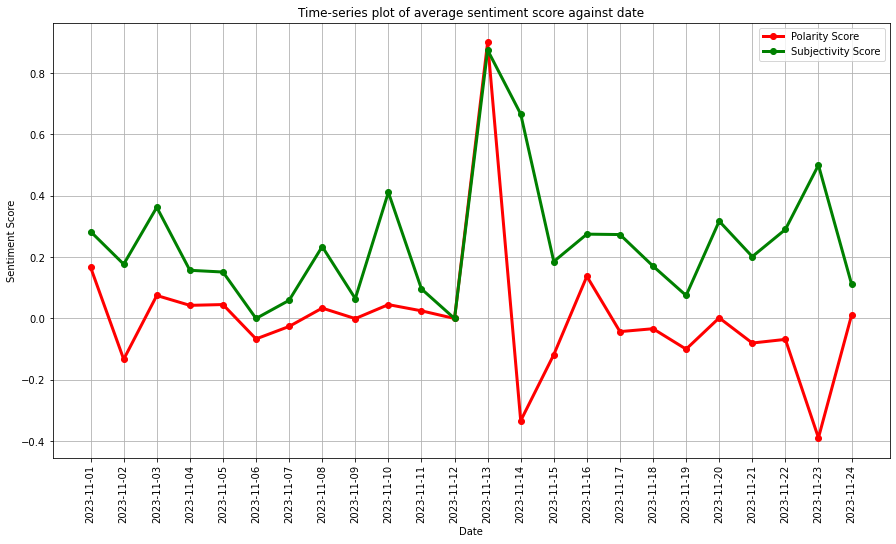

In [18]:
plt.figure(figsize=(15,8))
plt.plot(news_datewise.index,news_datewise['Polarity Scores'],color='red',label='Polarity Score',linestyle='-' ,marker='o', linewidth=3)
plt.plot(news_datewise.index,news_datewise['Subjectivity Scores'],color='green',label='Subjectivity Score',linestyle='-' ,marker='o', linewidth=3)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid()
plt.title('Time-series plot of average sentiment score against date')
plt.savefig('Sentiment Score vs Date.png')
plt.show()

We can see that there is a good correlation between the patterns of the 2 scores. Within the dates, there is no temporal reasoning to scores. Some days have very high sentiments for both parameters (11/13), some days have visibly opposing sentiments (11/23), and some days have no heavy sentiments, with scores close to 0 as well!